<a href="https://colab.research.google.com/github/tolossamuel/Linear-Regrassion/blob/main/HousePrice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [2]:
path_test = "drive/MyDrive/Project1/House_price_prediction/test.csv"
path_train = "drive/MyDrive/Project1/House_price_prediction/train.csv"

In [3]:
df_train = pd.read_csv(path_train)
df_test = pd.read_csv(path_test)

In [4]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
df_test.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [7]:
df_test.shape

(1459, 80)

In [8]:
df = pd.concat([df_train,df_test])
df.reset_index()

,index,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
2915,1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
2916,1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
2917,1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN


In [9]:
df.shape

(2919, 81)

In [10]:
_sum = 0
for x in df.columns:
  if df[x].isnull().sum() > 0:
    print(x, df[x].isnull().sum())
    _sum += df[x].isnull().sum()
print(_sum)

MSZoning 4
LotFrontage 486
Alley 2721
Utilities 2
Exterior1st 1
Exterior2nd 1
MasVnrType 1766
MasVnrArea 23
BsmtQual 81
BsmtCond 82
BsmtExposure 82
BsmtFinType1 79
BsmtFinSF1 1
BsmtFinType2 80
BsmtFinSF2 1
BsmtUnfSF 1
TotalBsmtSF 1
Electrical 1
BsmtFullBath 2
BsmtHalfBath 2
KitchenQual 1
Functional 2
FireplaceQu 1420
GarageType 157
GarageYrBlt 159
GarageFinish 159
GarageCars 1
GarageArea 1
GarageQual 159
GarageCond 159
PoolQC 2909
Fence 2348
MiscFeature 2814
SaleType 1
SalePrice 1459
17166


In [11]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [12]:
df["MSZoning"].unique()

array(['RL', 'RM', 'C (all)', 'FV', 'RH', nan], dtype=object)

In [13]:
df["MSZoning"].isnull().sum()

4

In [14]:
df["MSZoning"].value_counts()

MSZoning
RL         2265
RM          460
FV          139
RH           26
C (all)      25
Name: count, dtype: int64

In [15]:
df["MSZoning"].fillna("RL", inplace=True)

In [16]:
df["Alley"].unique()

array([nan, 'Grvl', 'Pave'], dtype=object)

In [17]:
df["Alley"].isnull().sum()

2721

In [18]:
df["Alley"].value_counts()

Alley
Grvl    120
Pave     78
Name: count, dtype: int64

In [19]:
df["Alley"].fillna("NoAlley", inplace=True)
df["Alley"].isnull().sum()

0

In [20]:
df["Utilities"].unique()

array(['AllPub', 'NoSeWa', nan], dtype=object)

In [21]:
df["Utilities"].isnull().sum()

2

In [22]:
df["Utilities"].value_counts()

Utilities
AllPub    2916
NoSeWa       1
Name: count, dtype: int64

In [23]:
df["Utilities"].fillna("AllPub", inplace=True)

In [24]:
df["Exterior1st"].isnull().sum()

1

In [25]:
df["Exterior1st"].value_counts()

Exterior1st
VinylSd    1025
MetalSd     450
HdBoard     442
Wd Sdng     411
Plywood     221
CemntBd     126
BrkFace      87
WdShing      56
AsbShng      44
Stucco       43
BrkComm       6
AsphShn       2
Stone         2
CBlock        2
ImStucc       1
Name: count, dtype: int64

In [26]:
df["Exterior1st"].fillna("VinylSd", inplace=True)

In [27]:
df["Exterior2nd"].isnull().sum()

1

In [28]:
df["Exterior2nd"].value_counts()

Exterior2nd
VinylSd    1014
MetalSd     447
HdBoard     406
Wd Sdng     391
Plywood     270
CmentBd     126
Wd Shng      81
BrkFace      47
Stucco       47
AsbShng      38
Brk Cmn      22
ImStucc      15
Stone         6
AsphShn       4
CBlock        3
Other         1
Name: count, dtype: int64

In [29]:
df["MasVnrType"].fillna(df["MasVnrType"].mode()[0], inplace=True)

In [30]:
df["BsmtQual"].isnull().sum()

81

In [31]:
df["BsmtQual"].value_counts()

BsmtQual
TA    1283
Gd    1209
Ex     258
Fa      88
Name: count, dtype: int64

In [32]:
df["BsmtCond"].fillna("No Basement", inplace=True)

In [33]:
df["BsmtExposure"].isnull().sum()

82

In [34]:
df["BsmtExposure"].value_counts()

BsmtExposure
No    1904
Av     418
Gd     276
Mn     239
Name: count, dtype: int64

In [35]:
df["BsmtExposure"].fillna("No Basement", inplace=True)

In [36]:
df["BsmtFinType1"].isnull().sum()

79

In [37]:
df["BsmtFinType1"].value_counts()

BsmtFinType1
Unf    851
GLQ    849
ALQ    429
Rec    288
BLQ    269
LwQ    154
Name: count, dtype: int64

In [38]:
df["BsmtFinType1"].fillna("No Basement", inplace=True)

In [39]:
df["BsmtFinType2"].isnull().sum()

80

In [40]:
df["BsmtFinType2"].fillna("No Basement", inplace=True)

In [41]:
df["Electrical"].isnull().sum()

1

In [42]:
df["Electrical"].value_counts()

Electrical
SBrkr    2671
FuseA     188
FuseF      50
FuseP       8
Mix         1
Name: count, dtype: int64

In [43]:
df["Electrical"].fillna("SBrkr", inplace=True)

In [44]:
df["KitchenQual"].isnull().sum()

1

In [45]:
df["KitchenQual"].value_counts()

KitchenQual
TA    1492
Gd    1151
Ex     205
Fa      70
Name: count, dtype: int64

In [46]:
df["KitchenQual"].fillna("TA", inplace=True)

In [47]:
df["Functional"].isnull().sum()

2

In [48]:
df["Functional"].value_counts()

Functional
Typ     2717
Min2      70
Min1      65
Mod       35
Maj1      19
Maj2       9
Sev        2
Name: count, dtype: int64

In [49]:
df["Functional"].fillna("Typ", inplace=True)

In [50]:
df["FireplaceQu"].isnull().sum()

1420

In [51]:
df["FireplaceQu"].fillna("No Fireplace",inplace = True)

In [52]:
df["GarageType"].isnull().sum()

157

In [53]:
df["GarageType"].fillna("No Garage", inplace=True)

In [54]:
df["GarageFinish"].isnull().sum()

159

In [55]:
df["GarageFinish"].fillna("No Garage", inplace=True)

In [56]:
df["GarageQual"].isnull().sum()

159

In [57]:
df["GarageQual"].fillna("No Garage", inplace=True)

In [58]:
df["GarageCond"].isnull().sum()

159

In [59]:
df["GarageCond"].fillna("No Garage", inplace=True)

In [60]:
df["Fence"].isnull().sum()

2348

In [61]:
df["Fence"].fillna("No Fence", inplace=True)

In [62]:
df["MiscFeature"].isnull().sum()

2814

In [63]:
df["MiscFeature"].fillna("No MiscFeature", inplace=True)

In [64]:
df["SaleType"].isnull().sum()

1

In [65]:
df["SaleType"].value_counts()

SaleType
WD       2525
New       239
COD        87
ConLD      26
CWD        12
ConLI       9
ConLw       8
Oth         7
Con         5
Name: count, dtype: int64

In [66]:
df["SaleType"].fillna("WD", inplace=True)

In [67]:
df["SaleCondition"].isnull().sum()

0

In [68]:
df_copy = df.copy()

In [ ]:
# df = df_copy.copy()

In [69]:
def null_value():
  _sum = 0
  for x in df.columns:
    if df[x].isnull().sum() > 0:
      print(x, df[x].isnull().sum())
      _sum += df[x].isnull().sum()
  print(_sum)

In [70]:
df["LotFrontage"].isnull().sum()

486

In [71]:
df["LotFrontage"].unique()

array([ 65.,  80.,  68.,  60.,  84.,  85.,  75.,  nan,  51.,  50.,  70.,
        91.,  72.,  66., 101.,  57.,  44., 110.,  98.,  47., 108., 112.,
        74., 115.,  61.,  48.,  33.,  52., 100.,  24.,  89.,  63.,  76.,
        81.,  95.,  69.,  21.,  32.,  78., 121., 122.,  40., 105.,  73.,
        77.,  64.,  94.,  34.,  90.,  55.,  88.,  82.,  71., 120., 107.,
        92., 134.,  62.,  86., 141.,  97.,  54.,  41.,  79., 174.,  99.,
        67.,  83.,  43., 103.,  93.,  30., 129., 140.,  35.,  37., 118.,
        87., 116., 150., 111.,  49.,  96.,  59.,  36.,  56., 102.,  58.,
        38., 109., 130.,  53., 137.,  45., 106., 104.,  42.,  39., 144.,
       114., 128., 149., 313., 168., 182., 138., 160., 152., 124., 153.,
        46.,  26.,  25., 119.,  31.,  28., 117., 113., 125., 135., 136.,
        22., 123., 195., 155., 126., 200., 131., 133.])

In [72]:
df["LotFrontage"].fillna(df["LotFrontage"].median(), inplace=True)

In [73]:
df["Exterior2nd"].unique()

array(['VinylSd', 'MetalSd', 'Wd Shng', 'HdBoard', 'Plywood', 'Wd Sdng',
       'CmentBd', 'BrkFace', 'Stucco', 'AsbShng', 'Brk Cmn', 'ImStucc',
       'AsphShn', 'Stone', 'Other', 'CBlock', nan], dtype=object)

In [74]:
df["Exterior2nd"].value_counts()

Exterior2nd
VinylSd    1014
MetalSd     447
HdBoard     406
Wd Sdng     391
Plywood     270
CmentBd     126
Wd Shng      81
BrkFace      47
Stucco       47
AsbShng      38
Brk Cmn      22
ImStucc      15
Stone         6
AsphShn       4
CBlock        3
Other         1
Name: count, dtype: int64

In [75]:
df["Exterior2nd"].fillna("VinylSd", inplace=True)

In [76]:
df["MasVnrArea"] = df["MasVnrArea"].fillna(df["MasVnrArea"].mean())

In [77]:
df["BsmtQual"].unique()

array(['Gd', 'TA', 'Ex', nan, 'Fa'], dtype=object)

In [78]:
df["BsmtQual"].fillna("No Basement", inplace=True)

In [79]:
df["BsmtFinSF1"].fillna(df["BsmtFinSF1"].mean(), inplace=True)

In [80]:
df["BsmtFinSF2"].fillna(df["BsmtFinSF2"].median(), inplace=True)

In [81]:
df["TotalBsmtSF"].fillna(df["TotalBsmtSF"].median(), inplace=True)

In [82]:
df["BsmtFullBath"].fillna(df["BsmtFullBath"].median(), inplace=True)

In [83]:
df["BsmtHalfBath"].fillna(df["BsmtHalfBath"].median(), inplace=True)

In [84]:
df["GarageYrBlt"].fillna(df["GarageYrBlt"].median(), inplace=True)

In [85]:
df["GarageCars"].fillna(df["GarageCars"].median(), inplace=True)

In [86]:
df["GarageArea"].fillna(df["GarageArea"].median(), inplace=True)

In [87]:
df["PoolQC"].fillna("No Pool", inplace=True)

In [88]:
null_value()

BsmtUnfSF 1
SalePrice 1459
1460


In [89]:
df["BsmtUnfSF"].fillna(df["BsmtUnfSF"].mean(), inplace=True)

In [90]:
null_value()

SalePrice 1459
1459


In [91]:
df_copy = df.copy()

In [92]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [93]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NoAlley,Reg,Lvl,AllPub,...,0,No Pool,No Fence,No MiscFeature,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NoAlley,Reg,Lvl,AllPub,...,0,No Pool,No Fence,No MiscFeature,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NoAlley,IR1,Lvl,AllPub,...,0,No Pool,No Fence,No MiscFeature,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NoAlley,IR1,Lvl,AllPub,...,0,No Pool,No Fence,No MiscFeature,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NoAlley,IR1,Lvl,AllPub,...,0,No Pool,No Fence,No MiscFeature,0,12,2008,WD,Normal,250000.0


In [94]:
sum(df.isnull().sum())

1459

In [95]:
df["MSZoning"].unique()

array(['RL', 'RM', 'C (all)', 'FV', 'RH'], dtype=object)

In [96]:
df["MSZoning"] = df["MSZoning"].map({"RL":0,"RM":1,"RP":2,"RH":3,"I":4,"FV":5,"C (all)":6,"A":7})

In [97]:
# df_copy = df.copy()
null_value()

SalePrice 1459
1459


In [98]:
df["Street"].unique()

array(['Pave', 'Grvl'], dtype=object)

In [99]:
df["Street"] = df["Street"].map({"Grvl":0,"Pave":1})

In [100]:
df["Alley"].unique()

array(['NoAlley', 'Grvl', 'Pave'], dtype=object)

In [101]:
df["Alley"] = df["Alley"].map({"Grvl":0,"Pave":1,"NoAlley":2})

In [103]:
df["LotShape"].unique()

array([0, 1, 2, 3])

In [102]:
df["LotShape"] = df["LotShape"].map({"Reg":0,"IR1":1,"IR2":2,"IR3":3})

In [104]:
null_value()

SalePrice 1459
1459


In [106]:
df["LandContour"].unique()

array(['Lvl', 'Bnk', 'Low', 'HLS'], dtype=object)

In [107]:
df["LandContour"] = df["LandContour"].map({"Lvl":0,"Bnk":1,"HLS":2,"Low":3})

In [108]:
df["Utilities"].unique()

array(['AllPub', 'NoSeWa'], dtype=object)

In [109]:
df["Utilities"] = df["Utilities"].map({"AllPub":0,"NoSeWa":1})

In [110]:
df["LotConfig"].unique()

array(['Inside', 'FR2', 'Corner', 'CulDSac', 'FR3'], dtype=object)

In [111]:
df["LotConfig"] = df["LotConfig"].map({"Inside":0,"Corner":1,"CulDSac":2,"FR2":3,"FR3":4})

In [112]:
df["LandSlope"] = df["LandSlope"].map({"Gtl":0,"Mod":1,"Sev":2})

In [113]:
# Neighborhood===========================
null_value()

SalePrice 1459
1459


In [114]:
df["BldgType"].unique()

array(['1Fam', '2fmCon', 'Duplex', 'TwnhsE', 'Twnhs'], dtype=object)

In [115]:
df["BldgType"] = df["BldgType"].map({"1Fam":0,"2fmCon":1,"Duplex":2,"TwnhsE":3,"Twnhs":4})

In [116]:
df["HouseStyle"] = df["HouseStyle"].map({"1Story":0,"1.5Fin":1,"1.5Unf":2,"2Story":3,"2.5Fin":4,"2.5Unf":5,"SFoyer":6,"SLvl":7})

In [117]:
df["RoofStyle"] = df["RoofStyle"].map({"Flat":0,"Gable":1,"Gambrel":2,"Hip":3,"Mansard":4,"Shed":5})

In [118]:
df["RoofMatl"] = df["RoofMatl"].map({"CompShg":0,"Membran":1,"Metal":2,"Roll":3,"Tar&Grv":4,"WdShake":5,"WdShngl":6,"ClyTile":7})

In [119]:
# Exterior1st========================
# Exterior2nd=====================
null_value()

SalePrice 1459
1459


In [120]:
df["MasVnrType"] = df["MasVnrType"].map({"BrkCmn":0,"BrkFace":1,"CBlock":2,"None":3,"Stone":4})

In [121]:
df["ExterQual"] = df["ExterQual"].map({"Ex":0,"Gd":1,"TA":2,"Fa":3,"Po":4})

In [122]:
df["ExterCond"] = df["ExterCond"].map({"Ex":0,"Gd":1,"TA":2,"Fa":3,"Po":4})

In [123]:
df["Foundation"] = df["Foundation"].map({"BrkTil":0,"CBlock":1,"PConc":2,"Slab":3,"Stone":4,"Wood":5})

In [124]:
df["BsmtQual"].unique()

array(['Gd', 'TA', 'Ex', 'No Basement', 'Fa'], dtype=object)

In [125]:
df["BsmtQual"] = df["BsmtQual"].map({"Ex":0,"Gd":1,"TA":2,"Fa":3,"Po":4,"No Basement":5})

In [126]:
df["BsmtCond"].unique()

array(['TA', 'Gd', 'No Basement', 'Fa', 'Po'], dtype=object)

In [127]:
df["BsmtCond"] = df["BsmtCond"].map({"Ex":0,"Gd":1,"TA":2,"Fa":3,"Po":4,"No Basement":5})

In [128]:
df["BsmtExposure"] = df["BsmtExposure"].map({"Gd":0,"Av":1,"Mn":2,"No":3,"No Basement":4})

In [129]:
df["BsmtFinType1"].unique()

array(['GLQ', 'ALQ', 'Unf', 'Rec', 'BLQ', 'No Basement', 'LwQ'],
      dtype=object)

In [130]:
df["BsmtFinType1"] = df["BsmtFinType1"].map({"GLQ":0,"ALQ":1,"BLQ":2,"Rec":3,"LwQ":4,"Unf":5,"No Basement":6})

In [131]:
df["BsmtFinType2"] = df["BsmtFinType2"].map({"GLQ":0,"ALQ":1,"BLQ":2,"Rec":3,"LwQ":4,"Unf":5,"No Basement":6})

In [132]:
df["Heating"] = df["Heating"].map({"GasA":0,"GasW":1,"Grav":2,"Wall":3,"Floor":4,"OthW":5})

In [133]:
df["HeatingQC"] = df["HeatingQC"].map({"Ex":0,"Gd":1,"TA":2,"Fa":3,"Po":4})

In [134]:
df["CentralAir"] = df["CentralAir"].map({"Y":0,"N":1})

In [135]:
null_value()

SalePrice 1459
1459


In [136]:
df["Electrical"].unique()

array(['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix'], dtype=object)

In [137]:
df["Electrical"] = df["Electrical"].map({"SBrkr":0,"Fuse":1,"FuseA":2,"FuseF":3,"FuseP":4,"Mix":5})

In [138]:
df["KitchenQual"] = df["KitchenQual"].map({"Ex":0,"Gd":1,"TA":2,"Fa":3,"Po":4})

In [139]:
df["Functional"] = df["Functional"].map({"Typ":0,"Min1":1,"Min2":2,"Mod":3,"Maj1":4,"Maj2":5,"Sev":6,"Sal":7})

In [140]:
df["FireplaceQu"].unique()

array(['No Fireplace', 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

In [141]:
df["FireplaceQu"] = df["FireplaceQu"].map({"Ex":0,"Gd":1,"TA":2,"Fa":3,"Po":4,"No Fireplace":5})

In [142]:
df["GarageType"].unique()

array(['Attchd', 'Detchd', 'BuiltIn', 'CarPort', 'No Garage', 'Basment',
       '2Types'], dtype=object)

In [143]:
df["GarageType"] = df["GarageType"].map({"Attchd":0,"Detchd":1,"BuiltIn":2,"Basment":3,"CarPort":4,"2Types":5,"No Garage":6})

In [144]:
df["GarageFinish"] = df["GarageFinish"].map({"Fin":0,"RFn":1,"Unf":2,"No Garage":3})

In [145]:
df["GarageQual"].unique()

array(['TA', 'Fa', 'Gd', 'No Garage', 'Ex', 'Po'], dtype=object)

In [147]:
df_copy2 = df.copy()

In [146]:
null_value()

SalePrice 1459
1459


In [148]:
df["GarageQual"] = df["GarageQual"].map({"Ex":0,"Gd":1,"TA":2,"Fa":3,"Po":4,"No Garage":5})

In [149]:
df["GarageCond"] = df["GarageCond"].map({"Ex":0,"Gd":1,"TA":2,"Fa":3,"Po":4,"No Garage":5})

In [150]:
df["PavedDrive"] = df["PavedDrive"].map({"Y":0,"N":1,"P":2})

In [151]:
df["PoolQC"].unique()

array(['No Pool', 'Ex', 'Fa', 'Gd'], dtype=object)

In [152]:
df["PoolQC"] = df["PoolQC"].map({"Ex":0,"Gd":1,"TA":2,"Fa":3,"No Pool":4})

In [153]:
df["Fence"].unique()

array(['No Fence', 'MnPrv', 'GdWo', 'GdPrv', 'MnWw'], dtype=object)

In [154]:
df["Fence"] = df["Fence"].map({"GdPrv":0,"MnPrv":1,"GdWo":2,"MnWw":3,"No Fence":4})

In [155]:
df["MiscFeature"].unique()

array(['No MiscFeature', 'Shed', 'Gar2', 'Othr', 'TenC'], dtype=object)

In [156]:
df["MiscFeature"] = df["MiscFeature"].map({"Elev":0,"Gar2":1,"Othr":2,"Shed":3,"TenC":4,"No MiscFeature":5})

In [157]:
df["SaleType"].unique()

array(['WD', 'New', 'COD', 'ConLD', 'ConLI', 'CWD', 'ConLw', 'Con', 'Oth'],
      dtype=object)

In [160]:
df_copy2 = df.copy()


In [167]:
sum(df_copy2.isnull().sum())

1459

In [168]:
df = df_copy2.copy()

In [169]:
df["SaleType"] = df["SaleType"].map({"WD":0,"New":1,"COD":2,"ConLD":3,"ConLI":4,"CWD":5,"ConLw":6,"Con":7,"Oth":8})

In [171]:
df["SaleCondition"].unique()

array(['Normal', 'Abnorml', 'Partial', 'AdjLand', 'Alloca', 'Family'],
      dtype=object)

In [172]:
df["SaleCondition"] =df["SaleCondition"].map({"Normal":0,"Abnorml":1,"AdjLand":2,"Alloca":3,"Family":4,"Partial":5})

In [173]:
null_value()

SalePrice 1459
1459


In [174]:
df_copy2 = df.copy()

In [188]:
df = df_copy2.copy()

In [189]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2919 non-null   int64  
 3   LotFrontage    2919 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   int64  
 6   Alley          2919 non-null   int64  
 7   LotShape       2919 non-null   int64  
 8   LandContour    2919 non-null   int64  
 9   Utilities      2919 non-null   int64  
 10  LotConfig      2919 non-null   int64  
 11  LandSlope      2919 non-null   int64  
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   int64  
 16  HouseStyle     2919 non-null   int64  
 17  OverallQual    2919 non-null   int64  
 18  OverallCond  

In [190]:
df["Condition1"].unique()

array(['Norm', 'Feedr', 'PosN', 'Artery', 'RRAe', 'RRNn', 'RRAn', 'PosA',
       'RRNe'], dtype=object)

In [191]:
df["Condition1"] = df["Condition1"].map({"Norm":0,"Feedr":1,"PosN":2,"Artery":3,"RRAe":4,"RRNn":5,"RRAn":6,"PosA":7,"RRNe":8,"RRAn":9})

In [192]:
null_value()

SalePrice 1459
1459


In [193]:
df["Condition2"].unique()

array(['Norm', 'Artery', 'RRNn', 'Feedr', 'PosN', 'PosA', 'RRAn', 'RRAe'],
      dtype=object)

In [194]:
df["Condition2"] = df["Condition2"].map({"Artery":0,"Feedr":1,"RRAe":2,"RRAn":3,"PosN":4,"PosA":5,"RRNe":6,"RRNn":7,"RRNv":8,"Norm":9})

In [195]:
null_value()

SalePrice 1459
1459


In [196]:
df["Exterior1st"].unique()

array(['VinylSd', 'MetalSd', 'Wd Sdng', 'HdBoard', 'BrkFace', 'WdShing',
       'CemntBd', 'Plywood', 'AsbShng', 'Stucco', 'BrkComm', 'AsphShn',
       'Stone', 'ImStucc', 'CBlock'], dtype=object)

In [197]:
df["Exterior1st"] = df["Exterior1st"].map({"VinylSd":0,"MetalSd":1,"Wd Sdng":2,"BrkFace":3,"WdShing":4,"AsbShng":5,"AsphShn":6,"BrkComm":7,"CBlock":8,"CemntBd":9,"HdBoard":10,"ImStucc":11,"Plywood":12,"Other":13,"PreCast":14,"Stone":15,"Stucco":16})

In [198]:
null_value()

SalePrice 1459
1459


In [199]:
df["Exterior2nd"].unique()

array(['VinylSd', 'MetalSd', 'Wd Shng', 'HdBoard', 'Plywood', 'Wd Sdng',
       'CmentBd', 'BrkFace', 'Stucco', 'AsbShng', 'Brk Cmn', 'ImStucc',
       'AsphShn', 'Stone', 'Other', 'CBlock'], dtype=object)

In [200]:
df["Exterior2nd"] = df["Exterior2nd"].map({"VinylSd":0,"MetalSd":1,"Wd Shng":2,"HdBoard":3,"Plywood":4,"Wd Sdng":5,"CmentBd":6,"BrkFace":7,"Stucco":8,"AsbShng":9,"Brk Cmn":10,"ImStucc":11,"AsphShn":12,"Stone":13,"Other":14,"CBlock":15})

In [201]:
null_value()

SalePrice 1459
1459


In [202]:
df_copy2 = df.copy()

In [203]:
df["Neighborhood"].isnull().sum()

0

In [204]:
df["Neighborhood"] = df["Neighborhood"].map({"CollgCr":0,"Veenker":1,"Crawfor":2,"NoRidge":3,"Mitchel":4,"Somerst":5,"NWAmes":6,"OldTown":7,"BrkSide":8,"Sawyer":9,"NridgHt":10,"NAmes":11,"SawyerW":12,"IDOTRR":13,"MeadowV":14,"Edwards":15,"Timber":16,"Gilbert":17,"StoneBr":18,"ClearCr":19,"NPkVill":20,"Blmngtn":21,"BrDale":22,"SWISU":23,"Blueste":24})

In [205]:
null_value()

SalePrice 1459
1459


In [206]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2919 non-null   int64  
 3   LotFrontage    2919 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   int64  
 6   Alley          2919 non-null   int64  
 7   LotShape       2919 non-null   int64  
 8   LandContour    2919 non-null   int64  
 9   Utilities      2919 non-null   int64  
 10  LotConfig      2919 non-null   int64  
 11  LandSlope      2919 non-null   int64  
 12  Neighborhood   2919 non-null   int64  
 13  Condition1     2919 non-null   int64  
 14  Condition2     2919 non-null   int64  
 15  BldgType       2919 non-null   int64  
 16  HouseStyle     2919 non-null   int64  
 17  OverallQual    2919 non-null   int64  
 18  OverallCond  

In [207]:
from sklearn.feature_selection import VarianceThreshold

In [208]:
_sum = 0
for x in df.columns:
  if df[x].isnull().sum() > 0:
    print(x, df[x].isnull().sum())
    _sum += df[x].isnull().sum()
print(_sum)

SalePrice 1459
1459


In [ ]:
# df_copy = df.copy()
# df_data = df_copy[["Id"]]

In [209]:
# df.head()
df.drop(["Id"],axis = 1,inplace = True)

In [281]:
train_df = df.loc[(~df["SalePrice"].isnull())]
test_df = df.loc[(df["SalePrice"].isnull())]


In [283]:
train_df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [325]:
temp = (train_df["MSSubClass"])**(1/1.2)
temp =  pd.DataFrame(temp)
temp["SalePrice"] = train_df["SalePrice"]
temp.columns = ["MSSubClass","SalePrice"]

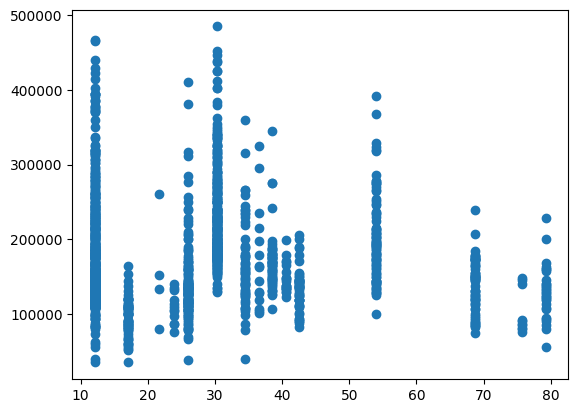

In [326]:
plt.scatter(temp["MSSubClass"],temp["SalePrice"])

<Axes: title={'center': 'SalePrice'}, xlabel='MSSubClass'>

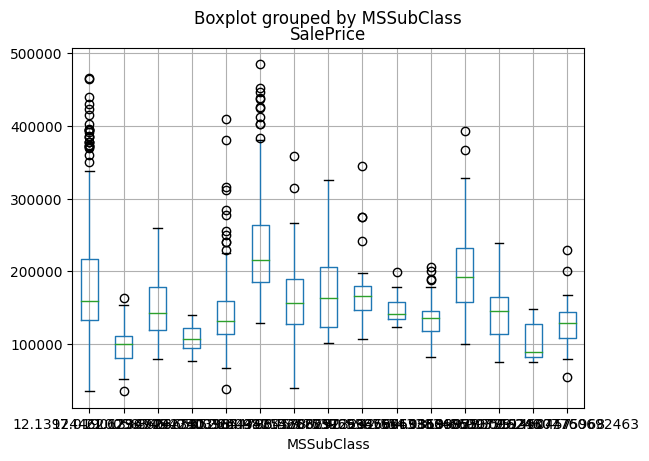

In [327]:
temp.boxplot(column="SalePrice",by="MSSubClass")

In [311]:
train_df.loc[(train_df["SalePrice"] >= 500000)&(train_df["Alley"] == 2)]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
769,60,0,47.0,53504,1,2,2,2,0,2,...,0,4,4,5,0,6,2010,0,0,538000.0
803,60,0,107.0,13891,1,2,0,0,0,0,...,0,4,4,5,0,1,2009,1,5,582933.0
1046,60,0,85.0,16056,1,2,1,0,0,0,...,0,4,4,5,0,7,2006,1,5,556581.0


<ipython-input-312-4640cbd4e041>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df.drop([769,803,1046],inplace = True)


In [211]:
X = train_df.drop(["SalePrice"], axis=1)
y = train_df["SalePrice"]


In [382]:
X.shape

(1460, 79)

In [383]:
len(y)

1460

In [407]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [408]:
x_test.shape

(438, 79)

In [409]:
len(y_test)

438

In [ ]:
test_df


In [410]:
from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()
df_robust_scaler=pd.DataFrame(scaler.fit_transform(x_train))
df_robust_scaler.columns=x_train.columns
df_robust_scaler.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,-0.6,0.0,0.631579,0.193787,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-3.0,0.0,0.0,-0.333333,0.0,0.0,0.0
1,2.6,1.0,-1.736842,-1.435233,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.333333,-1.0,0.0,0.0
2,0.2,5.0,0.210526,-0.232544,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,7.0,0.0
3,-0.6,0.0,0.842105,0.501423,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-1.000000,-0.5,0.0,0.0
4,0.2,0.0,-1.315789,0.258463,0.0,0.0,2.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.666667,0.5,6.0,0.0


In [470]:
test_df.drop(["SalePrice"],axis = 1,inplace = True)

<ipython-input-470-a7c3d0bbd6ef>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df.drop(["SalePrice"],axis = 1,inplace = True)


In [471]:
train_dff = pd.DataFrame(scaler.transform(test_df))
train_dff.columns = x_train.columns


In [476]:
test_df = train_dff.copy()

In [477]:
test_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,-0.6,3.0,0.631579,0.489796,0.0,0.0,0.0,0.0,0.0,0.0,...,120.0,0.0,0.0,-3.0,0.0,0.0,0.000000,1.0,0.0,0.0
1,-0.6,0.0,0.684211,1.130503,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,-4.0,12500.0,0.000000,1.0,0.0,0.0
2,0.2,0.0,0.315789,1.024647,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-3.0,0.0,0.0,-1.000000,1.0,0.0,0.0
3,0.2,0.0,0.526316,0.091564,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0
4,1.4,0.0,-1.315789,-1.113062,0.0,0.0,1.0,2.0,0.0,0.0,...,144.0,0.0,0.0,0.0,0.0,0.0,-1.666667,1.0,0.0,0.0


In [473]:
df_test_data = pd.DataFrame(scaler.transform(x_test))
df_test_data.columns = x_train.columns
df_test_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,-1.012,0.0,-3.573407,-2.325510,-1.0,-2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-4.0,-7.0,-5.0,0.0,-2.444444,-1004.50,0.0,0.0
1,-0.996,0.0,-3.495845,-2.325285,-1.0,-2.0,1.0,0.0,0.0,1.0,...,0.0,0.0,-4.0,-4.0,-5.0,0.0,-2.222222,-1003.50,0.0,0.0
2,-1.008,1.0,-3.612188,-2.325478,-1.0,-4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-4.0,-4.0,-5.0,0.0,-2.333333,-1003.50,0.0,0.0
3,-1.000,1.0,-3.628809,-2.325710,-1.0,-2.0,0.0,0.0,0.0,1.0,...,0.0,0.0,-4.0,-4.0,-5.0,0.0,-1.555556,-1004.50,0.0,0.0
4,-1.012,0.0,-3.520776,-2.325247,-1.0,-2.0,1.0,2.0,0.0,0.0,...,0.0,0.0,-4.0,-4.0,-5.0,0.0,-1.666667,-1003.75,0.0,0.0


In [414]:
x_test = df_test_data.copy()

In [415]:
x_train = df_robust_scaler.copy()

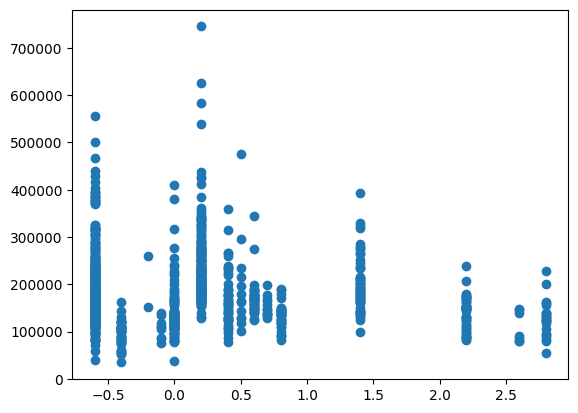

In [416]:
plt.scatter(df_robust_scaler["MSSubClass"],y_train)

In [417]:
var_thres = VarianceThreshold(threshold=0)
var_thres.fit(x_train)
VarianceThreshold(threshold = 0)
constant_columns = [column for column in x_train.columns
                    if column not in x_train.columns[var_thres.get_support()]]
print(len(constant_columns))

0


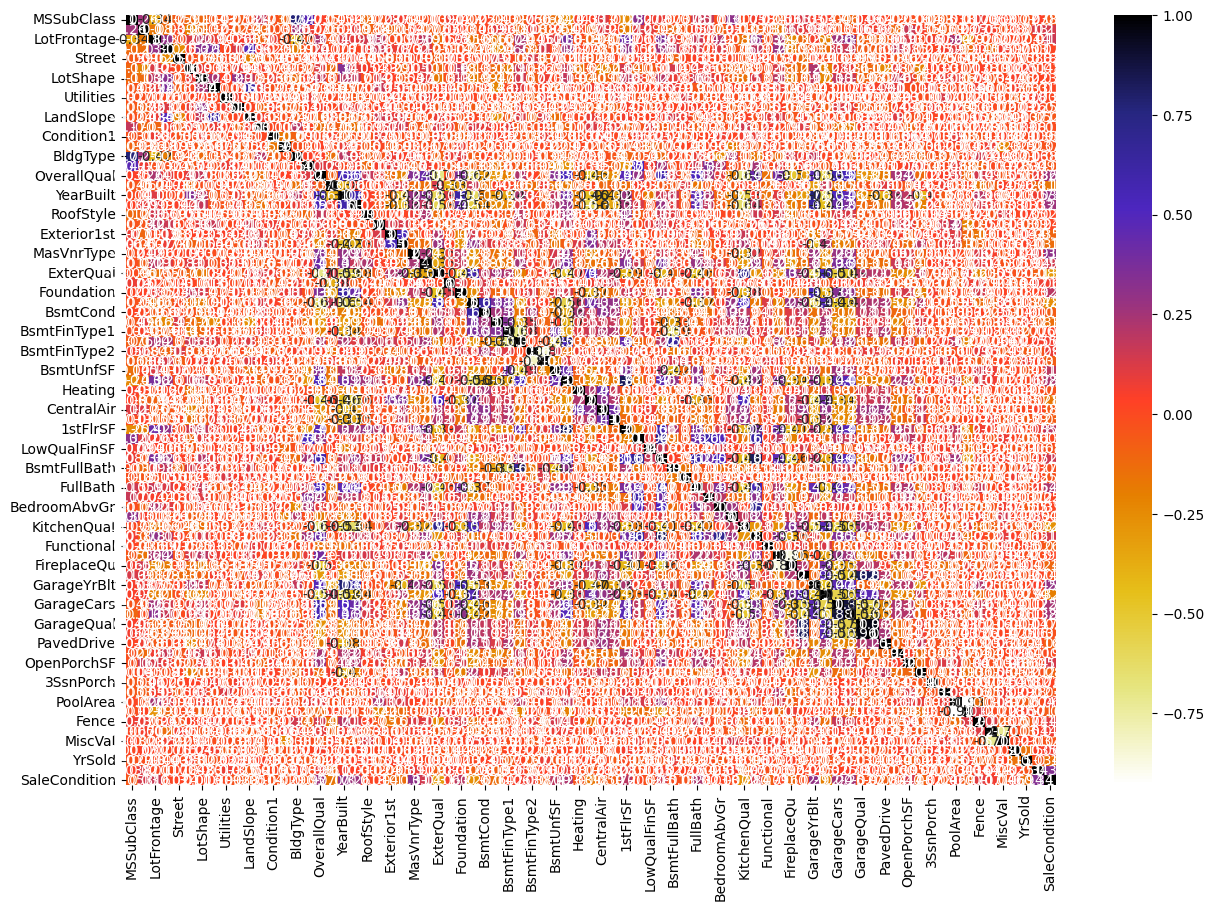

In [406]:
import seaborn as sns
plt.figure(figsize=(15,10))
cor = x_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [343]:
def correlation(dataset,threshold):
  col_corr = set()
  corr_matrix = dataset.corr()
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if abs(corr_matrix.iloc[i,j]) > threshold:
        colname = corr_matrix.columns[i]
        col_corr.add(colname)
  return col_corr

In [344]:
dependet_feature = correlation(x_train,0.8)

In [345]:
len(dependet_feature)

0

In [346]:
dependet_feature

set()

In [219]:
# x_train.drop(dependet_feature, axis=1, inplace=True)
# x_test.drop(dependet_feature, axis=1, inplace=True)
# test_df.drop(dependet_feature, axis=1, inplace=True)

<ipython-input-219-908084096d3f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df.drop(dependet_feature, axis=1, inplace=True)


In [418]:
x_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,-0.6,0.0,0.631579,0.193787,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-3.0,0.0,0.0,-0.333333,0.0,0.0,0.0
1,2.6,1.0,-1.736842,-1.435233,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.333333,-1.0,0.0,0.0
2,0.2,5.0,0.210526,-0.232544,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,7.0,0.0
3,-0.6,0.0,0.842105,0.501423,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-1.000000,-0.5,0.0,0.0
4,0.2,0.0,-1.315789,0.258463,0.0,0.0,2.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.666667,0.5,6.0,0.0


In [419]:
x_test.shape

(438, 79)

In [221]:
_sum = 0
for x in df.columns:
  if df[x].isnull().sum() > 0:
    print(x, df[x].isnull().sum())
    _sum += df[x].isnull().sum()
print(_sum)

SalePrice 1459
1459


In [348]:
from sklearn.feature_selection import mutual_info_regression

In [349]:
mutual_info = mutual_info_regression(x_train, y_train)

In [350]:
len(mutual_info)

51

In [351]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = x_train.columns
mutual_info.sort_values(ascending=False,inplace = True)


In [352]:
value = mutual_info.tail(20)

In [354]:
value.tail(20)

CentralAir       0.082220
MasVnrArea       0.079096
SaleCondition    0.078856
BsmtExposure     0.078270
HalfBath         0.076747
SaleType         0.069947
LotShape         0.064227
MasVnrType       0.059707
BedroomAbvGr     0.059668
PavedDrive       0.053368
BldgType         0.052574
Condition1       0.042606
Electrical       0.041977
ExterCond        0.038362
Fence            0.037730
BsmtCond         0.034103
LotConfig        0.027971
Alley            0.023635
KitchenAbvGr     0.023273
BsmtFullBath     0.020886
dtype: float64

In [227]:
# x_train.drop(value.index, axis=1, inplace=True)
# x_test.drop(value.index, axis=1, inplace=True)
# test_df.drop(value.index, axis=1, inplace=True)

<ipython-input-227-65ba14470345>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df.drop(value.index, axis=1, inplace=True)


In [355]:
x_train.shape

(1022, 51)

In [236]:
import scipy.stats as stat
import pylab

In [356]:
def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()

In [357]:
x_train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Alley', 'LotShape',
       'LotConfig', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC',
       'CentralAir', 'Electrical', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'Fence', 'SaleType',
       'SaleCondition'],
      dtype='object')

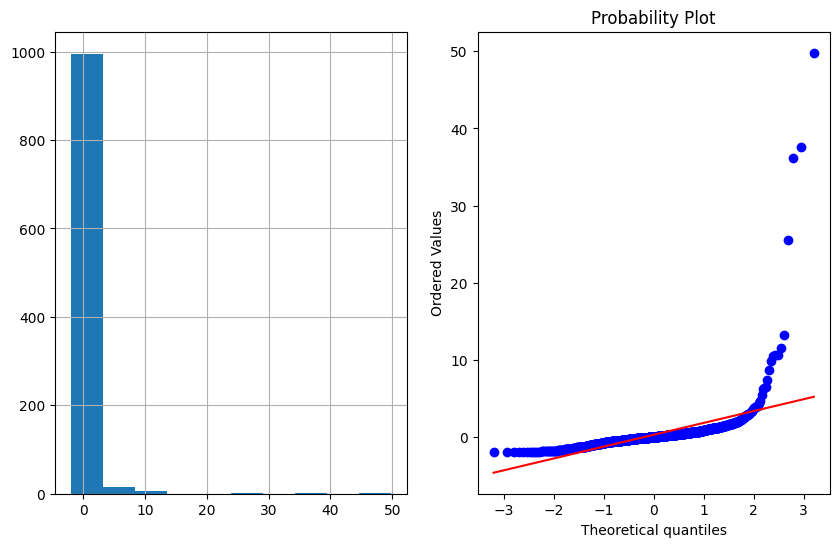

In [370]:
plot_data(x_train,"LotArea")

In [240]:

import numpy as np

In [371]:
temp = (np.log(x_train["LotArea"]))

In [372]:
temp =  pd.DataFrame(temp)
temp.columns = ["LotFrontage"]

In [248]:
temp = (x_train["MSSubClass"])**(1/2)
temp =  pd.DataFrame(temp)
temp.columns = ["MSSubClass"]

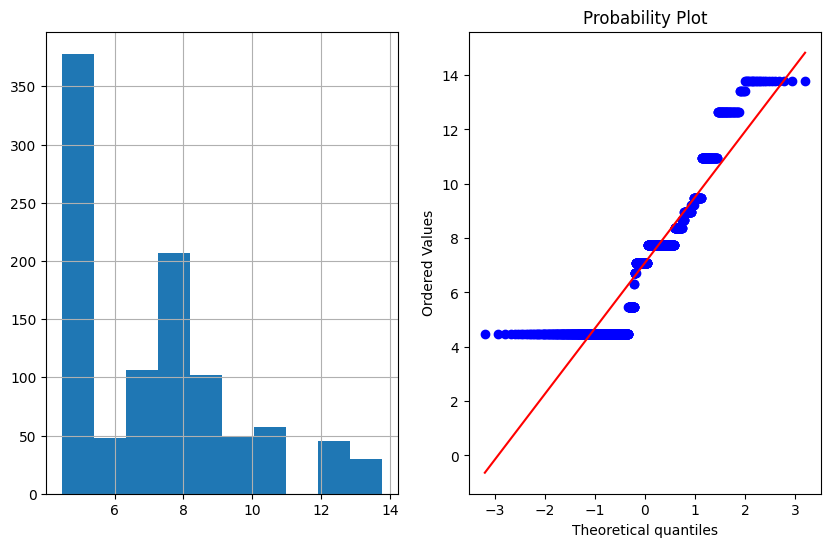

In [249]:
plot_data(temp,"MSSubClass")

In [250]:
temp = (x_train["MSSubClass"])**(1/1.2)
temp =  pd.DataFrame(temp)
temp.columns = ["MSSubClass"]

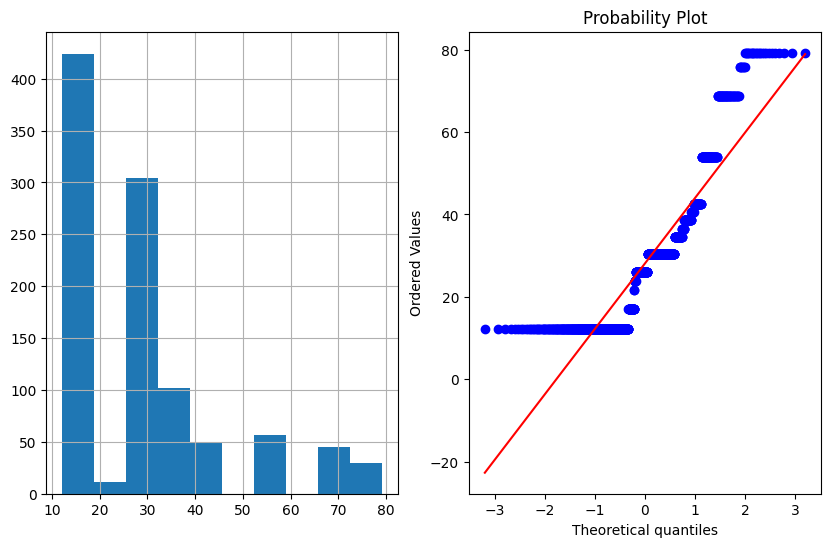

In [251]:
plot_data(temp,"MSSubClass")

In [252]:
temp,parameters=stat.boxcox(df['MSSubClass'])
temp =  pd.DataFrame(temp)
temp.columns = ["MSSubClass"]

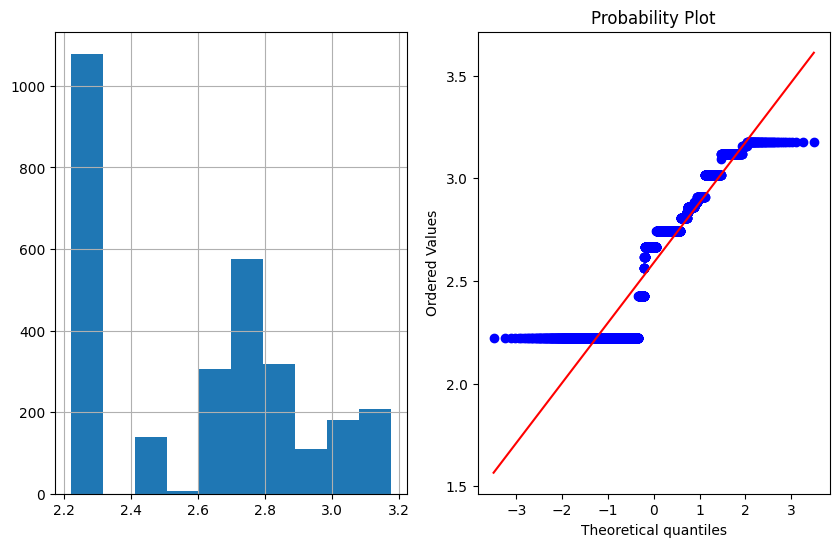

In [253]:
plot_data(temp,"MSSubClass")

{'whiskers': [<matplotlib.lines.Line2D at 0x7a44e017c4c0>,
 'caps': [<matplotlib.lines.Line2D at 0x7a44e017ca00>,
 'boxes': [<matplotlib.lines.Line2D at 0x7a44e017c220>],
 'medians': [<matplotlib.lines.Line2D at 0x7a44e017cf40>],
 'fliers': [<matplotlib.lines.Line2D at 0x7a44e017d1e0>],
 'means': []}

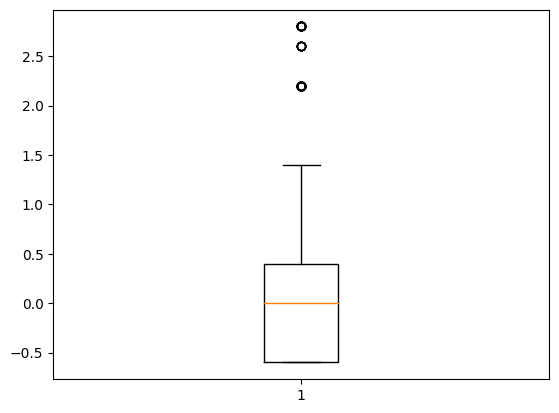

In [374]:
plt.boxplot(x_train["MSSubClass"])

In [255]:
x_trian_copy = x_train.copy()

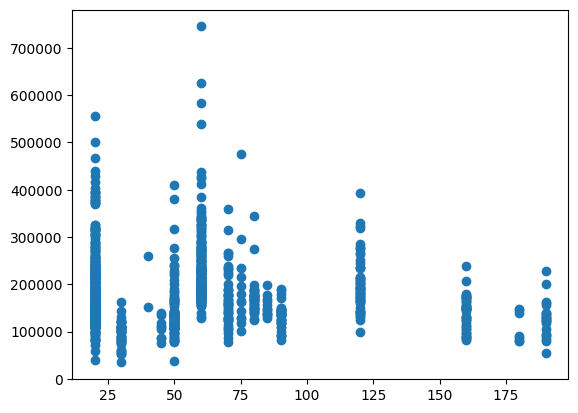

In [260]:
plt.scatter(x_train["MSSubClass"],y_train)

In [422]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [423]:
predict = model.predict(x_test)

In [424]:
from sklearn.metrics import mean_squared_error,r2_score

In [425]:
r2_score(y_test,predict)

0.8306570821528324

In [426]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(x_train,y_train)

RandomForestRegressor()

In [427]:
predict = model.predict(x_test)

In [428]:
r2_score(y_test,predict)

0.8966809896171887

In [429]:
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor()
model.fit(x_train,y_train)

GradientBoostingRegressor()

In [430]:
predict = model.predict(x_test)

In [431]:
r2_score(y_test,predict)

0.9023871485553245

In [432]:
from sklearn.ensemble import AdaBoostRegressor
model = AdaBoostRegressor()
model.fit(x_train,y_train)

AdaBoostRegressor()

In [433]:
predict = model.predict(x_test)

In [434]:
r2_score(y_test,predict)

0.8447346805559554

In [435]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(x_train,y_train)

ExtraTreesRegressor()

In [436]:
predict = model.predict(x_test)

In [437]:
r2_score(y_test,predict)

0.8633837821964773

In [438]:
from sklearn.ensemble import BaggingRegressor
model = BaggingRegressor()
model.fit(x_train,y_train)

BaggingRegressor()

In [439]:
predict = model.predict(x_test)

In [440]:
r2_score(y_test,predict)

0.8766095085043314

In [441]:
from sklearn.linear_model import Ridge
model = Ridge()
model.fit(x_train,y_train)

Ridge()

In [442]:
predict = model.predict(x_test)

In [443]:
r2_score(predict,y_test)

0.7800913719000705

In [444]:
# prompt: import xgboos

!pip install xgboost


In [445]:
from xgboost import XGBRegressor
model = XGBRegressor()
model.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [446]:
predict = model.predict(x_test)

In [447]:
r2_score(y_test,predict)

0.8958247372537615

In [448]:
# prompt: how to import naive bayes

from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(x_train,y_train)

GaussianNB()

In [449]:
predict = model.predict(x_test)

In [450]:
r2_score(y_test,predict)

0.41473139165181105

combine model to check


In [462]:


from sklearn.ensemble import VotingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

# Define the individual regressors
model1 = LinearRegression()
model2 = DecisionTreeRegressor()

# Create the ensemble model
model = VotingRegressor(estimators=[('lr', model1), ('dt', model2)])

# Train the ensemble model
model.fit(x_train, y_train)

# Make predictions
predictions = model.predict(x_test)

# Evaluate the model
r2_score(y_test, predictions)


0.8365175549990242

In [463]:
submit = pd.DataFrame(df_test["Id"], columns=["Id"])

In [464]:
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor()
model.fit(x_train,y_train)

GradientBoostingRegressor()

In [465]:
test_df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [467]:
test_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,20,3,80.0,11622,1,2,0,0,0,0,...,0,4,1,5,0,6,2010,0,0,NaN
1,20,0,81.0,14267,1,2,1,0,0,1,...,0,4,4,1,12500,6,2010,0,0,NaN
2,60,0,74.0,13830,1,2,1,0,0,0,...,0,4,1,5,0,3,2010,0,0,NaN
3,60,0,78.0,9978,1,2,1,0,0,0,...,0,4,4,5,0,6,2010,0,0,NaN
4,120,0,43.0,5005,1,2,1,2,0,0,...,0,4,4,5,0,1,2010,0,0,NaN


In [478]:
predict = model.predict(test_df)

In [479]:
submit["SalePrice"] = predict

In [480]:
submit.head()

,Id,SalePrice
0,1461,121007.116290
1,1462,155483.802180
2,1463,181225.955227
3,1464,178497.347669
4,1465,205188.450963


In [485]:
submit.to_csv('submission.csv',index = None)

In [486]:
submit.head()

,Id,SalePrice
0,1461,121007.116290
1,1462,155483.802180
2,1463,181225.955227
3,1464,178497.347669
4,1465,205188.450963
